In [20]:
import pandas as pd
import jieba
import numpy as np
import missingno as msno
import pandas_profiling

In [21]:
df_news = pd.read_csv('quotes.csv')
df_news = df_news.dropna()
df_news.head(20)

,author,tags,text
0,Albert Einstein,"change,deep-thoughts,thinking,world",“The world as we have created it is a process ...
1,J.K. Rowling,"abilities,choices","“It is our choices, Harry, that show what we t..."
2,Albert Einstein,"inspirational,life,live,miracle,miracles",“There are only two ways to live your life. On...
3,Jane Austen,"aliteracy,books,classic,humor","“The person, be it gentleman or lady, who has ..."
4,Marilyn Monroe,"be-yourself,inspirational","“Imperfection is beauty, madness is genius and..."
5,Albert Einstein,"adulthood,success,value",“Try not to become a man of success. Rather be...
6,André Gide,"life,love",“It is better to be hated for what you are tha...
7,Thomas A. Edison,"edison,failure,inspirational,paraphrased","“I have not failed. I've just found 10,000 way..."
8,Eleanor Roosevelt,misattributed-eleanor-roosevelt,“A woman is like a tea bag; you never know how...
9,Steve Martin,"humor,obvious,simile","“A day without sunshine is like, you know, nig..."


In [22]:
df_news.shape

(97, 3)

In [23]:
df_news.describe().T

,count,unique,top,freq
author,97,49,Albert Einstein,10
tags,97,83,love,4
text,97,97,"“The more that you read, the more things you w...",1


In [24]:
print("tags:", len(df_news[(df_news.tags.isnull())]))

tags: 0


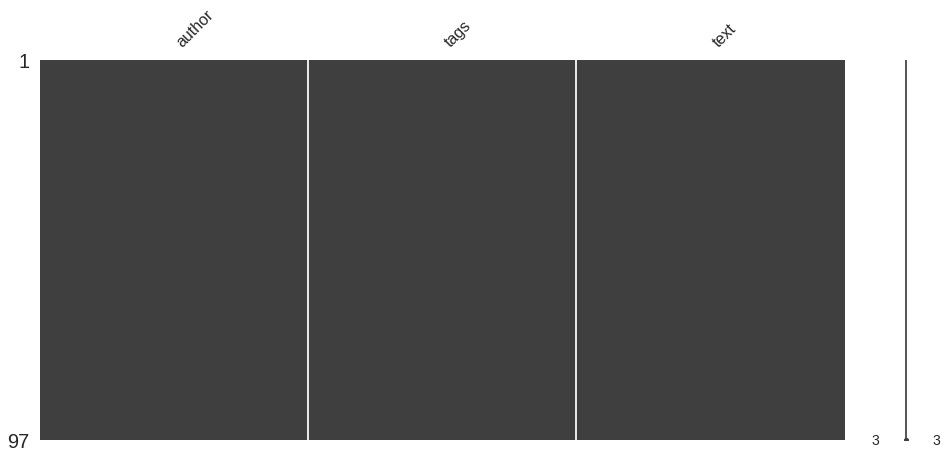

In [25]:
msno.matrix(df_news.sample(97),
            figsize=(16, 7),
            width_ratios=(15, 1))

In [26]:
pandas_profiling.ProfileReport(df_news)

/home/houser/anaconda3/lib/python3.7/site-packages/pandas_profiling/model/correlations.py:35: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1.0), (rcorr - 1.0)))
/home/houser/anaconda3/lib/python3.7/site-packages/pandas_profiling/model/correlations.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1.0), (rcorr - 1.0)))


In [27]:
content = df_news.text.values.tolist()
print (content[90])

“It takes courage to grow up and become who you really are.”


In [6]:
content_S = []
for line in content:
    current_segment = jieba.lcut(line)
    if len(current_segment) > 1 and current_segment != '\r\n': #换行符
        content_S.append(current_segment)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.360 seconds.
Prefix dict has been built successfully.


In [7]:
content_S[90]

['“',
 'It',
 ' ',
 'takes',
 ' ',
 'courage',
 ' ',
 'to',
 ' ',
 'grow',
 ' ',
 'up',
 ' ',
 'and',
 ' ',
 'become',
 ' ',
 'who',
 ' ',
 'you',
 ' ',
 'really',
 ' ',
 'are',
 '.',
 '”']

In [8]:
df_content=pd.DataFrame({'content_S':content_S})
df_content.head()

,content_S
0,"[“, The, , world, , as, , we, , have, , c..."
1,"[“, It, , is, , our, , choices, ,, , Harry..."
2,"[“, There, , are, , only, , two, , ways, ..."
3,"[“, The, , person, ,, , be, , it, , gentle..."
4,"[“, Imperfection, , is, , beauty, ,, , madn..."


In [9]:
stopwords=pd.read_csv("stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
stopwords.head(20)

,stopword
0,!
1,""""
2,#
3,$
4,%
5,&
6,'
7,(
8,)
9,*


In [10]:
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words
    #print (contents_clean)
        

contents = df_content.content_S.values.tolist()    
stopwords = stopwords.stopword.values.tolist()
contents_clean,all_words = drop_stopwords(contents,stopwords)

#df_content.content_S.isin(stopwords.stopword)
#df_content=df_content[~df_content.content_S.isin(stopwords.stopword)]
#df_content.head()

In [11]:
df_content=pd.DataFrame({'contents_clean':contents_clean})
df_content.head()

,contents_clean
0,"[The, , world, , , , , created, , , , ..."
1,"[It, , , , choices, , Harry, , , show, ..."
2,"[There, , , , , ways, , , live, , , li..."
3,"[The, , person, , , , gentleman, , , lad..."
4,"[Imperfection, , , beauty, , madness, , ,..."


In [12]:
df_all_words=pd.DataFrame({'all_words':all_words})
df_all_words.head()

,all_words
0,The
1,
2,world
3,
4,


In [13]:
words_count=df_all_words.groupby(by=['all_words'])['all_words'].agg({"count":np.size})
words_count=words_count.reset_index().sort_values(by=["count"],ascending=False)
words_count.head()

/home/houser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,all_words,count
0,,2205
74,a,60
28,I,58
308,love,20
439,t,19


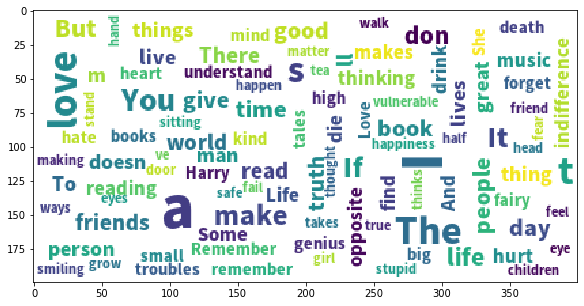

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

wordcloud=WordCloud(font_path="./data/NotoSansCJK-Black.ttc",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

In [15]:
import jieba.analyse
index = 90 #序号
print (df_news['text'][index])
content_S_str = "".join(content_S[index])  
print ("  ".join(jieba.analyse.extract_tags(content_S_str, topK=5, withWeight=False)))

“The truth." Dumbledore sighed. "It is a beautiful and terrible thing, and should therefore be treated with great caution.”
takes  courage  grow  up  become


In [16]:
from gensim import corpora, models, similarities
import gensim
#http://radimrehurek.com/gensim/

In [17]:
#做映射，相当于词袋
dictionary = corpora.Dictionary(contents_clean)
corpus = [dictionary.doc2bow(sentence) for sentence in contents_clean]

In [18]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20) #类似Kmeans自己指定K值

In [19]:
#一号分类结果
print (lda.print_topic(1, topn=5))

0.243*" " + 0.043*"′" + 0.022*"t" + 0.022*"don" + 0.022*"a"


In [20]:
for topic in lda.print_topics(num_topics=20, num_words=5):
    print (topic[1])

0.002*" " + 0.002*"a" + 0.002*"airless" + 0.002*"Lock" + 0.002*"madly"
0.243*" " + 0.043*"′" + 0.022*"t" + 0.022*"don" + 0.022*"a"
0.513*" " + 0.018*"It" + 0.011*"Harry" + 0.010*"show" + 0.010*"Some"
0.660*" " + 0.018*"a" + 0.008*"The" + 0.008*"s" + 0.006*"make"
0.002*" " + 0.002*"a" + 0.002*"airless" + 0.002*"Lock" + 0.002*"madly"
0.002*" " + 0.002*"a" + 0.002*"airless" + 0.002*"Lock" + 0.002*"madly"
0.002*" " + 0.002*"a" + 0.002*"airless" + 0.002*"Lock" + 0.002*"madly"
0.667*" " + 0.031*"I" + 0.018*"a" + 0.007*"love" + 0.005*"s"
0.002*" " + 0.002*"a" + 0.002*"airless" + 0.002*"Lock" + 0.002*"madly"
0.570*" " + 0.015*"day" + 0.009*"t" + 0.008*"thing" + 0.008*"don"
0.002*" " + 0.002*"a" + 0.002*"I" + 0.002*"airless" + 0.002*"Wrap"
0.002*" " + 0.002*"a" + 0.002*"airless" + 0.002*"Lock" + 0.002*"madly"
0.258*" " + 0.026*"lost" + 0.026*"Not" + 0.026*"wander" + 0.011*"madly"
0.647*" " + 0.012*"read" + 0.010*"tales" + 0.010*"fairy" + 0.009*"I"
0.002*" " + 0.002*"a" + 0.002*"airless" + 0.002

In [21]:
df_train=pd.DataFrame({'contents_clean':contents_clean,'label':df_news['author']})
df_train.tail()

,contents_clean,label
95,"[You, , , , understand, , a, , person, ,...",Harper Lee
96,"[You, , , , write, , , book, , , , , ...",Madeleine L'Engle
97,"[Never, , , , truth, , , people, , , ,...",Mark Twain
98,"[ , person, s, , a, , person, , , matter, ...",Dr. Seuss
99,"[ , a, , mind, , , books, , , a, , sword...",George R.R. Martin


In [22]:
df_train.label.unique()

array(['Albert Einstein', 'J.K. Rowling', 'Jane Austen', 'Marilyn Monroe',
       'André Gide', 'Thomas A. Edison', 'Eleanor Roosevelt',
       'Steve Martin', 'Bob Marley', 'Dr. Seuss', 'Douglas Adams',
       'Elie Wiesel', 'Friedrich Nietzsche', 'Mark Twain',
       'Allen Saunders', 'Pablo Neruda', 'Ralph Waldo Emerson',
       'Mother Teresa', 'Garrison Keillor', 'Jim Henson',
       'Charles M. Schulz', 'William Nicholson', 'Jorge Luis Borges',
       'George Eliot', 'George R.R. Martin', 'C.S. Lewis',
       'Martin Luther King Jr.', 'James Baldwin', 'Haruki Murakami',
       'Alexandre Dumas fils', 'Stephenie Meyer', 'Ernest Hemingway',
       'Helen Keller', 'George Bernard Shaw', 'Charles Bukowski',
       'Suzanne Collins', 'J.R.R. Tolkien', 'Alfred Tennyson',
       'Terry Pratchett', 'J.D. Salinger', 'George Carlin', 'John Lennon',
       'W.C. Fields', 'Jimi Hendrix', 'J.M. Barrie', 'E.E. Cummings',
       'Khaled Hosseini', 'Harper Lee', "Madeleine L'Engle"], dtype=objec